

## Insurance Cost Prediction
#### Problem Statement: 
Predict the Insurance Cost based on given dataset

Dataset Link:
<>

This dataset contains 1338 rows of insured data, where the Insurance charges are given against
the following attributes of the insured:
1. Age
2. Sex
3. BMI
4. Number of Children
5. Smoker
6. Region

The insurance company now wants to predict the cost for the new customer with the help of
above mentioned attributes. As a result, they want you to build a prediction model which can
correctly set the insurance cost of the new client provided the attributes are given.

# Prerequisites:

Connect to the drive to load data from source file

In [205]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import all the necessary python libraries 

In [206]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import SGDRegressor

%matplotlib inline

Load the data into a pandas dataframe 'data'

In [207]:
# import the dataset
data = pd.read_csv('/content/drive/MyDrive/MiniProject1/insurance.csv')

# Task 1:
Analyze the dataset and do EDA with proper interpretation (Exploratory Data 
Analysis)

## Solution 1:

In [208]:
# check the dimensions of the dataset.
print(data.shape)

(1338, 7)


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [210]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [211]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<font color="orange">Observations:</font> 
 <font color="darkcyan">There are 1338 rows and 7 columns of data.</font>

### Check & Remove Duplicate Rows

In [212]:
# check any duplicate rows
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (1, 7)



<font color="orange">Observations:</font> 
 <font color="darkcyan">There is one duplicate row.</font>

In [213]:
data.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [214]:
# drop duplicate rows
data = data.drop_duplicates()
print(data.shape)

(1337, 7)


In [215]:
data.count()

age         1337
sex         1337
bmi         1337
children    1337
smoker      1337
region      1337
charges     1337
dtype: int64

<font color="orange">Observations: </font><font color="darkcyan">The new dataset has 1337 rows and 7 columns</font>

### Detect and remove any missing or null values

In [216]:
# check any missing or null values
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<font color="orange">Observations: </font>
<font color="darkcyan">As you can see there are no missing values.</font>



### Choose a Graph style

In [217]:
# Styling the graphs
plt.style.use('bmh') # used for precision graphs

### Detect and Remove any Outliers

In [218]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [219]:
# Insurance charges distribution before outlier removal
print(data.describe()[['charges', 'bmi', 'age', 'children']])

            charges          bmi          age     children
count   1337.000000  1337.000000  1337.000000  1337.000000
mean   13279.121487    30.663452    39.222139     1.095737
std    12110.359656     6.100468    14.044333     1.205571
min     1121.873900    15.960000    18.000000     0.000000
25%     4746.344000    26.290000    27.000000     0.000000
50%     9386.161300    30.400000    39.000000     1.000000
75%    16657.717450    34.700000    51.000000     2.000000
max    63770.428010    53.130000    64.000000     5.000000


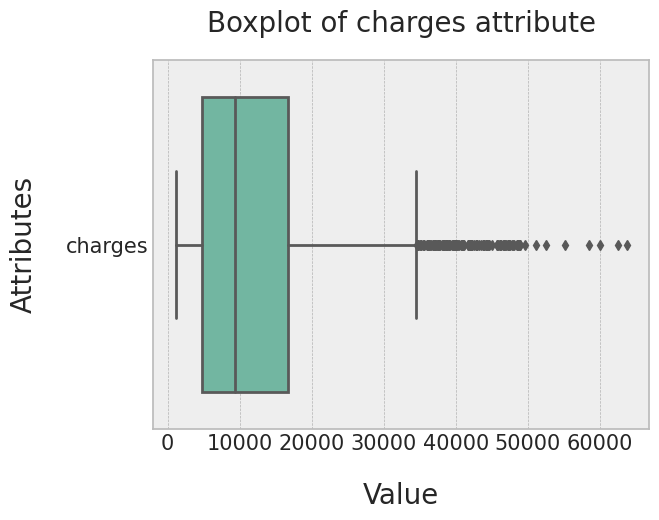

In [220]:
#create the boxplot for charges
ax = sns.boxplot(data = data[["charges"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of charges attribute", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

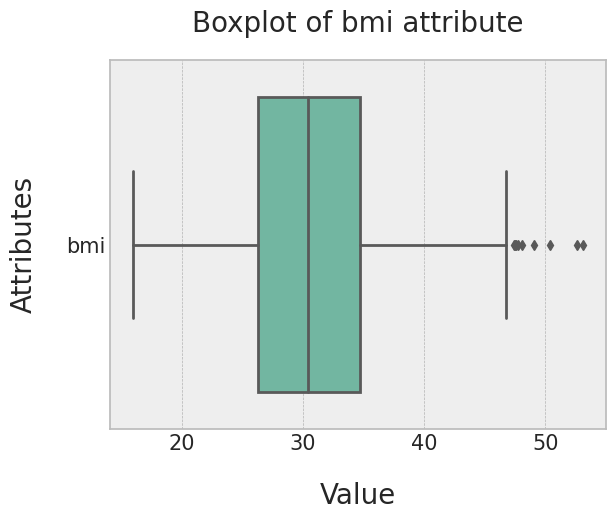

In [221]:
#create the boxplot for bmi
ax = sns.boxplot(data = data[["bmi"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of bmi attribute", fontsize = 20, pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

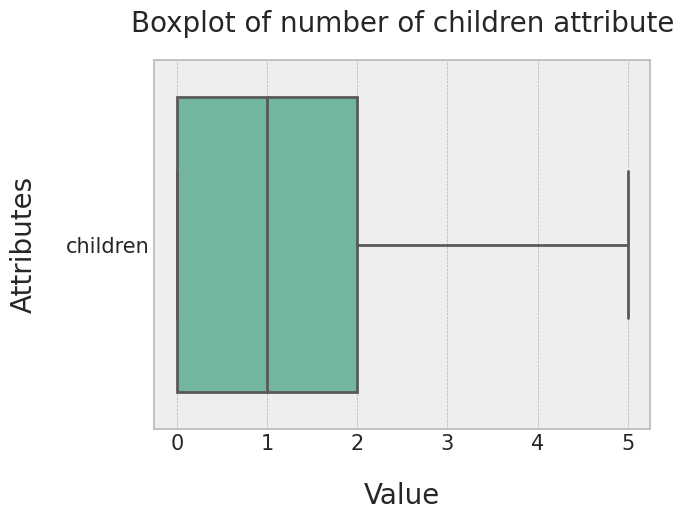

In [222]:
#create the boxplot for children 
ax = sns.boxplot(data = data[["children"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of number of children attribute", fontsize = 20, pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

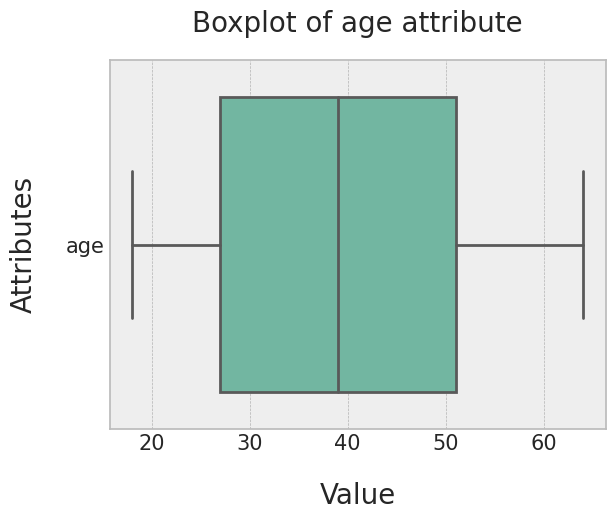

In [223]:
#create the boxplot for age
ax = sns.boxplot(data = data[["age"]], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of age attribute", fontsize = 20, pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

<font color="orange">Observations: </font>
<font color="darkcyan">As you can see there are outliers in bmi and charges data values. The outliers in charges are higher than the outliers for bmi data</font>

In [224]:
# define a function called 'outliers' that returns a list of index of outliers
def outliers(data, ft):
  Q1 = data[ft].quantile(0.25)
  Q3 = data[ft].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = data.index[(data[ft]< lower_bound)| (data[ft] > upper_bound)]

  return ls


In [225]:
# create empty list to store the output indices from multiple columns
index_list = []

for feature in ['age', 'charges', 'bmi', 'children']:
  index_list.extend(outliers(data, feature))
  

In [226]:
print(index_list)
len(index_list) # this may include duplicate indices

[14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 587, 609, 615, 621, 623, 629, 665, 667, 668, 674, 677, 682, 689, 697, 706, 725, 736, 738, 739, 742, 759, 803, 819, 826, 828, 842, 845, 850, 852, 856, 860, 883, 893, 901, 917, 947, 951, 953, 956, 958, 1012, 1021, 1022, 1031, 1036, 1037, 1047, 1049, 1062, 1070, 1078, 1090, 1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186, 1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323, 116, 286, 401, 543, 847, 860, 1047, 1088, 1317]


148

In [227]:
# define a function called 'remove' which returns a cleaned dataframe without outliers
def remove (data, ls):
  ls =  sorted(set(ls)) # set to remove duplicates
  data = data.drop(ls)
  return data

In [228]:
data_cleaned = remove(data, index_list)

In [229]:
data_cleaned.shape

(1192, 7)

In [230]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [231]:
# Insurance charges distribution after outlier removal
print(data_cleaned.describe()[['charges', 'bmi', 'age', 'children']])

            charges          bmi          age     children
count   1192.000000  1192.000000  1192.000000  1192.000000
mean    9949.235039    29.998033    38.998322     1.086409
std     7250.376386     5.869310    14.057457     1.216352
min     1121.873900    15.960000    18.000000     0.000000
25%     4425.455588    25.800000    26.000000     0.000000
50%     8411.754950    29.717500    39.000000     1.000000
75%    12979.854925    33.770000    51.000000     2.000000
max    34472.841000    46.750000    64.000000     5.000000


<font color="orange">Observations: </font>
<font color="darkcyan">There were 145 outliers for which the rows have been removed.But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing. You can also observe that after the outliers are removed the mean and std values have not changed much.</font>

In [232]:
data = data_cleaned

### Data Transformation

Log transformation is a common technique used to reduce skewness in a distribution and make it more symmetric. Skewness is a measure of the asymmetry of a probability distribution, and a right-skewed distribution has a long tail on the right side of the distribution. Log transformation can help to “stretch out” the tail of a right-skewed distribution, making it more symmetric and easier to analyze.

count     1192.000000
mean      9949.235039
std       7250.376386
min       1121.873900
25%       4425.455588
50%       8411.754950
75%      12979.854925
max      34472.841000
Name: charges, dtype: float64


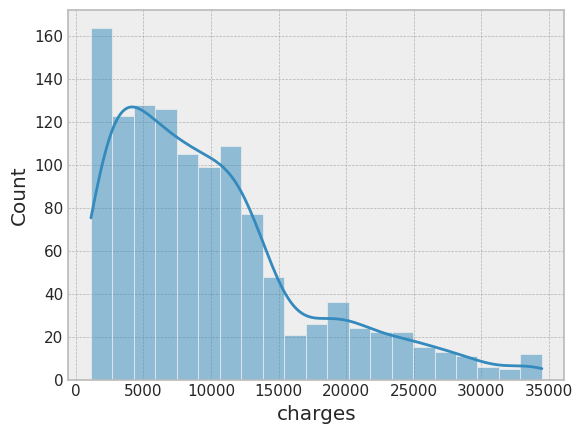

In [233]:
print(data['charges'].describe())
sns.histplot(data['charges'], kde=True)
plt.show()

As you can see above, our insurance data produces a right-skewed distribution.

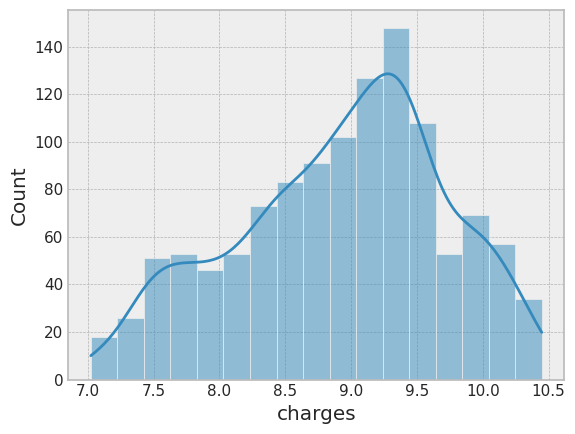

count    1192.000000
mean        8.922934
std         0.794894
min         7.022756
25%         8.395128
50%         9.037385
75%         9.471154
max        10.447927
Name: charges, dtype: float64


In [234]:
data['charges'] = np.log(data['charges'])
sns.histplot(data['charges'], kde=True)
plt.show()
print(data['charges'].describe())


Log transformation reduces skew and makes relationships more clear between variables. 
It’s important to note that the log transformation should only be applied to data that is positive, as the natural logarithm is not defined for values less than or equal to zero. Additionally, it’s important to keep in mind that the log transformation does not make the data normal, it just remove the skewness. There are other techniques to make data normal.

In [235]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


### Convert Catgorical data into numerical




Our dataset has both numerical and categorical features. Categorical features refer to string data types and can be easily understood by human beings. However, machines cannot interpret the categorical data directly. Therefore, the categorical data must be converted into numerical data for further processing.

There are many ways to convert categorical data into numerical data. The most popular ones are:-

1.   Dummy Variable Encoding
2.   Label Encoding

We will be using Label Encoding for our dataset.

In [236]:
# view top 5 data rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


In [237]:
# convert 'region' column values to numerical using Label Encoding
le = LabelEncoder()
label = le.fit_transform(data['region'])
data.drop("region", axis=1, inplace=True)
data["region"] = label
data.head()

,age,sex,bmi,children,smoker,charges,region
0,19,female,27.900,0,yes,9.734176,3
1,18,male,33.770,1,no,7.453302,2
2,28,male,33.000,3,no,8.400538,2
3,33,male,22.705,0,no,9.998092,1
4,32,male,28.880,0,no,8.260197,1


In [238]:
# convert 'sex' column values to numerical using Label Encoding
le = LabelEncoder()
label = le.fit_transform(data['sex'])
data.drop("sex", axis=1, inplace=True)
data["sex"] = label
data.head()

,age,bmi,children,smoker,charges,region,sex
0,19,27.900,0,yes,9.734176,3,0
1,18,33.770,1,no,7.453302,2,1
2,28,33.000,3,no,8.400538,2,1
3,33,22.705,0,no,9.998092,1,1
4,32,28.880,0,no,8.260197,1,1


In [239]:
# convert 'smoker' column values to numerical using Label Encoding
le = LabelEncoder()
label2 = le.fit_transform(data['smoker'])
data.drop("smoker", axis=1, inplace=True)
data["smoker"] = label2
data.head()

,age,bmi,children,charges,region,sex,smoker
0,19,27.900,0,9.734176,3,0,1
1,18,33.770,1,7.453302,2,1,0
2,28,33.000,3,8.400538,2,1,0
3,33,22.705,0,9.998092,1,1,0
4,32,28.880,0,8.260197,1,1,0


In [240]:
# reorder the columns after converting all categorical data to numerical
data = data[['age','sex', 'bmi', 'children', 'smoker', 'region', 'charges']]

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734176
1,18,1,33.770,1,0,2,7.453302
2,28,1,33.000,3,0,2,8.400538
3,33,1,22.705,0,0,1,9.998092
4,32,1,28.880,0,0,1,8.260197


### Normlize the data

Normalization is one of the most frequently used data preparation techniques, which helps us to change the values of numeric columns in the dataset to use a common scale. Although Normalization is no mandate for all datasets available, it is used whenever the attributes of the dataset have different ranges. It helps to enhance the performance and reliability of a model. We've decided to use mean/std to normalize though other methods like MinMaxScaler can be used

In [241]:
#we need to normalize the features using mean normalization
data = (data - data.mean())/data.std()
data.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.422613,-0.974732,-0.357458,-0.893170,2.762476,1.355475,1.020567
1,-1.493750,1.025062,0.642659,-0.071040,-0.361690,0.455349,-1.848840
2,-0.782384,1.025062,0.511468,1.573221,-0.361690,0.455349,-0.657189
3,-0.426700,1.025062,-1.242571,-0.893170,-0.361690,-0.444777,1.352580
4,-0.497837,1.025062,-0.190488,-0.893170,-0.361690,-0.444777,-0.833743




---



# Task 2:
Perform the various plotting techniques to identify the correlation relationship 
with proper observation

## Solution 2:

### Heatmap


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019950,0.122817,0.038948,-0.067880,0.004032,0.632716
sex,-0.019950,1.000000,0.016352,0.016284,0.014355,-0.006179,-0.054960
bmi,0.122817,0.016352,1.000000,0.006874,-0.256608,0.152963,-0.027918
children,0.038948,0.016284,0.006874,1.000000,-0.006307,0.022434,0.184509
smoker,-0.067880,0.014355,-0.256608,-0.006307,1.000000,-0.047671,0.476911
region,0.004032,-0.006179,0.152963,0.022434,-0.047671,1.000000,-0.094659
charges,0.632716,-0.054960,-0.027918,0.184509,0.476911,-0.094659,1.000000


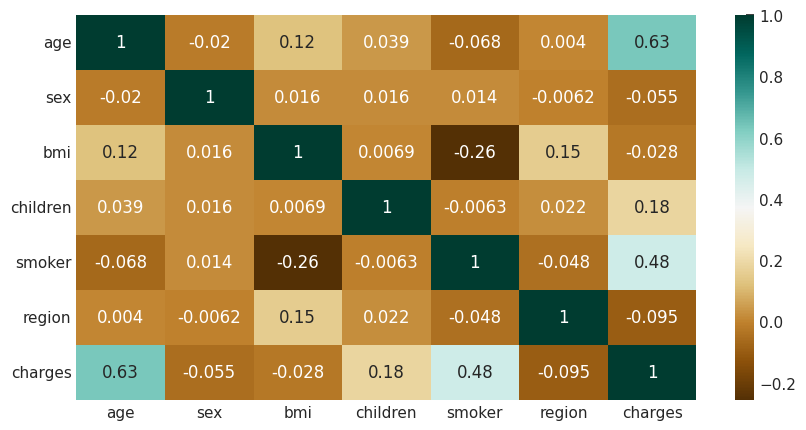

In [242]:
plt.figure(figsize=(10,5))
c= data.corr(method='pearson')
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [243]:
data_corr = data.corr('pearson')['charges'][:-1]
golden_features_list = data_corr[abs(data_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with charges:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with charges:
age    0.632716
Name: charges, dtype: float64


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.016633,0.076745,0.041428,-0.056473,0.005015,0.562609
sex,-0.016633,1.000000,0.014246,0.011321,0.014355,-0.005652,-0.036151
bmi,0.076745,0.014246,1.000000,0.000702,-0.220435,0.110414,-0.025947
children,0.041428,0.011321,0.000702,1.000000,-0.006030,0.012925,0.107291
smoker,-0.056473,0.014355,-0.220435,-0.006030,1.000000,-0.043470,0.409479
region,0.005015,-0.005652,0.110414,0.012925,-0.043470,1.000000,-0.066672
charges,0.562609,-0.036151,-0.025947,0.107291,0.409479,-0.066672,1.000000


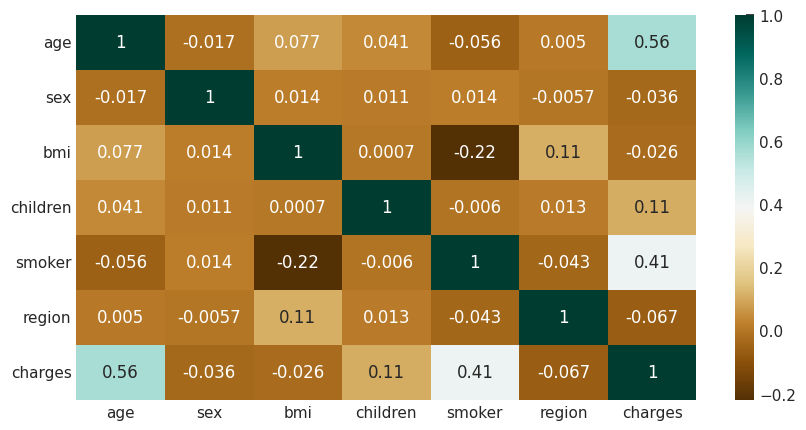

In [244]:
plt.figure(figsize=(10,5))
c= data.corr(method='kendall')
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [245]:
data_corr = data.corr('kendall')['charges'][:-1]
golden_features_list = data_corr[abs(data_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with charges:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with charges:
age    0.562609
Name: charges, dtype: float64


<font color="orange">Observations: </font>
<font color="darkcyan">Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the above heat map we know that the insurance charges feature depends mainly on age - using different correlation approaches (as correlation for age > 0.5, rest are all < 0.5).</font>


### Scatterplot

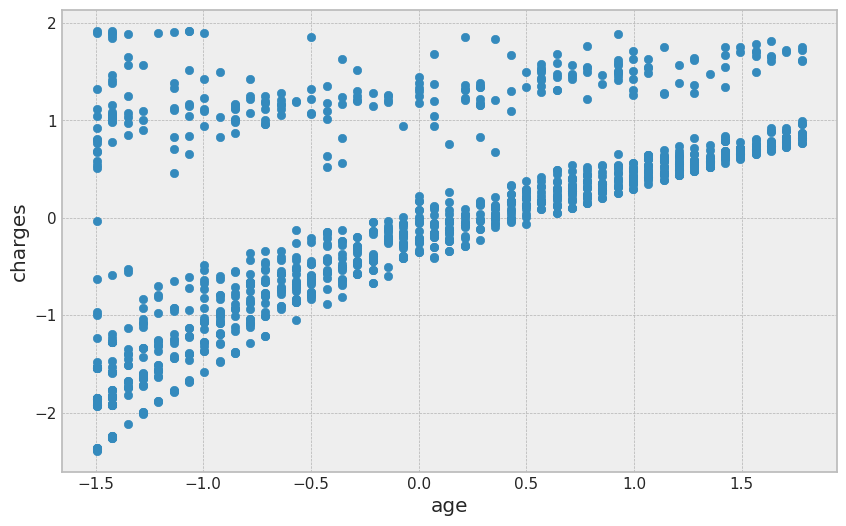

In [246]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['age'], data['charges'])
ax.set_xlabel('age')
ax.set_ylabel('charges')
plt.show()

<font color="orange">Observations:</font>
<font color="darkcyan"> We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between age and insurance charges and we can see the plot above. With the plot given above, we can easily draw a trend line. These features provide a good scattering of points.</font>

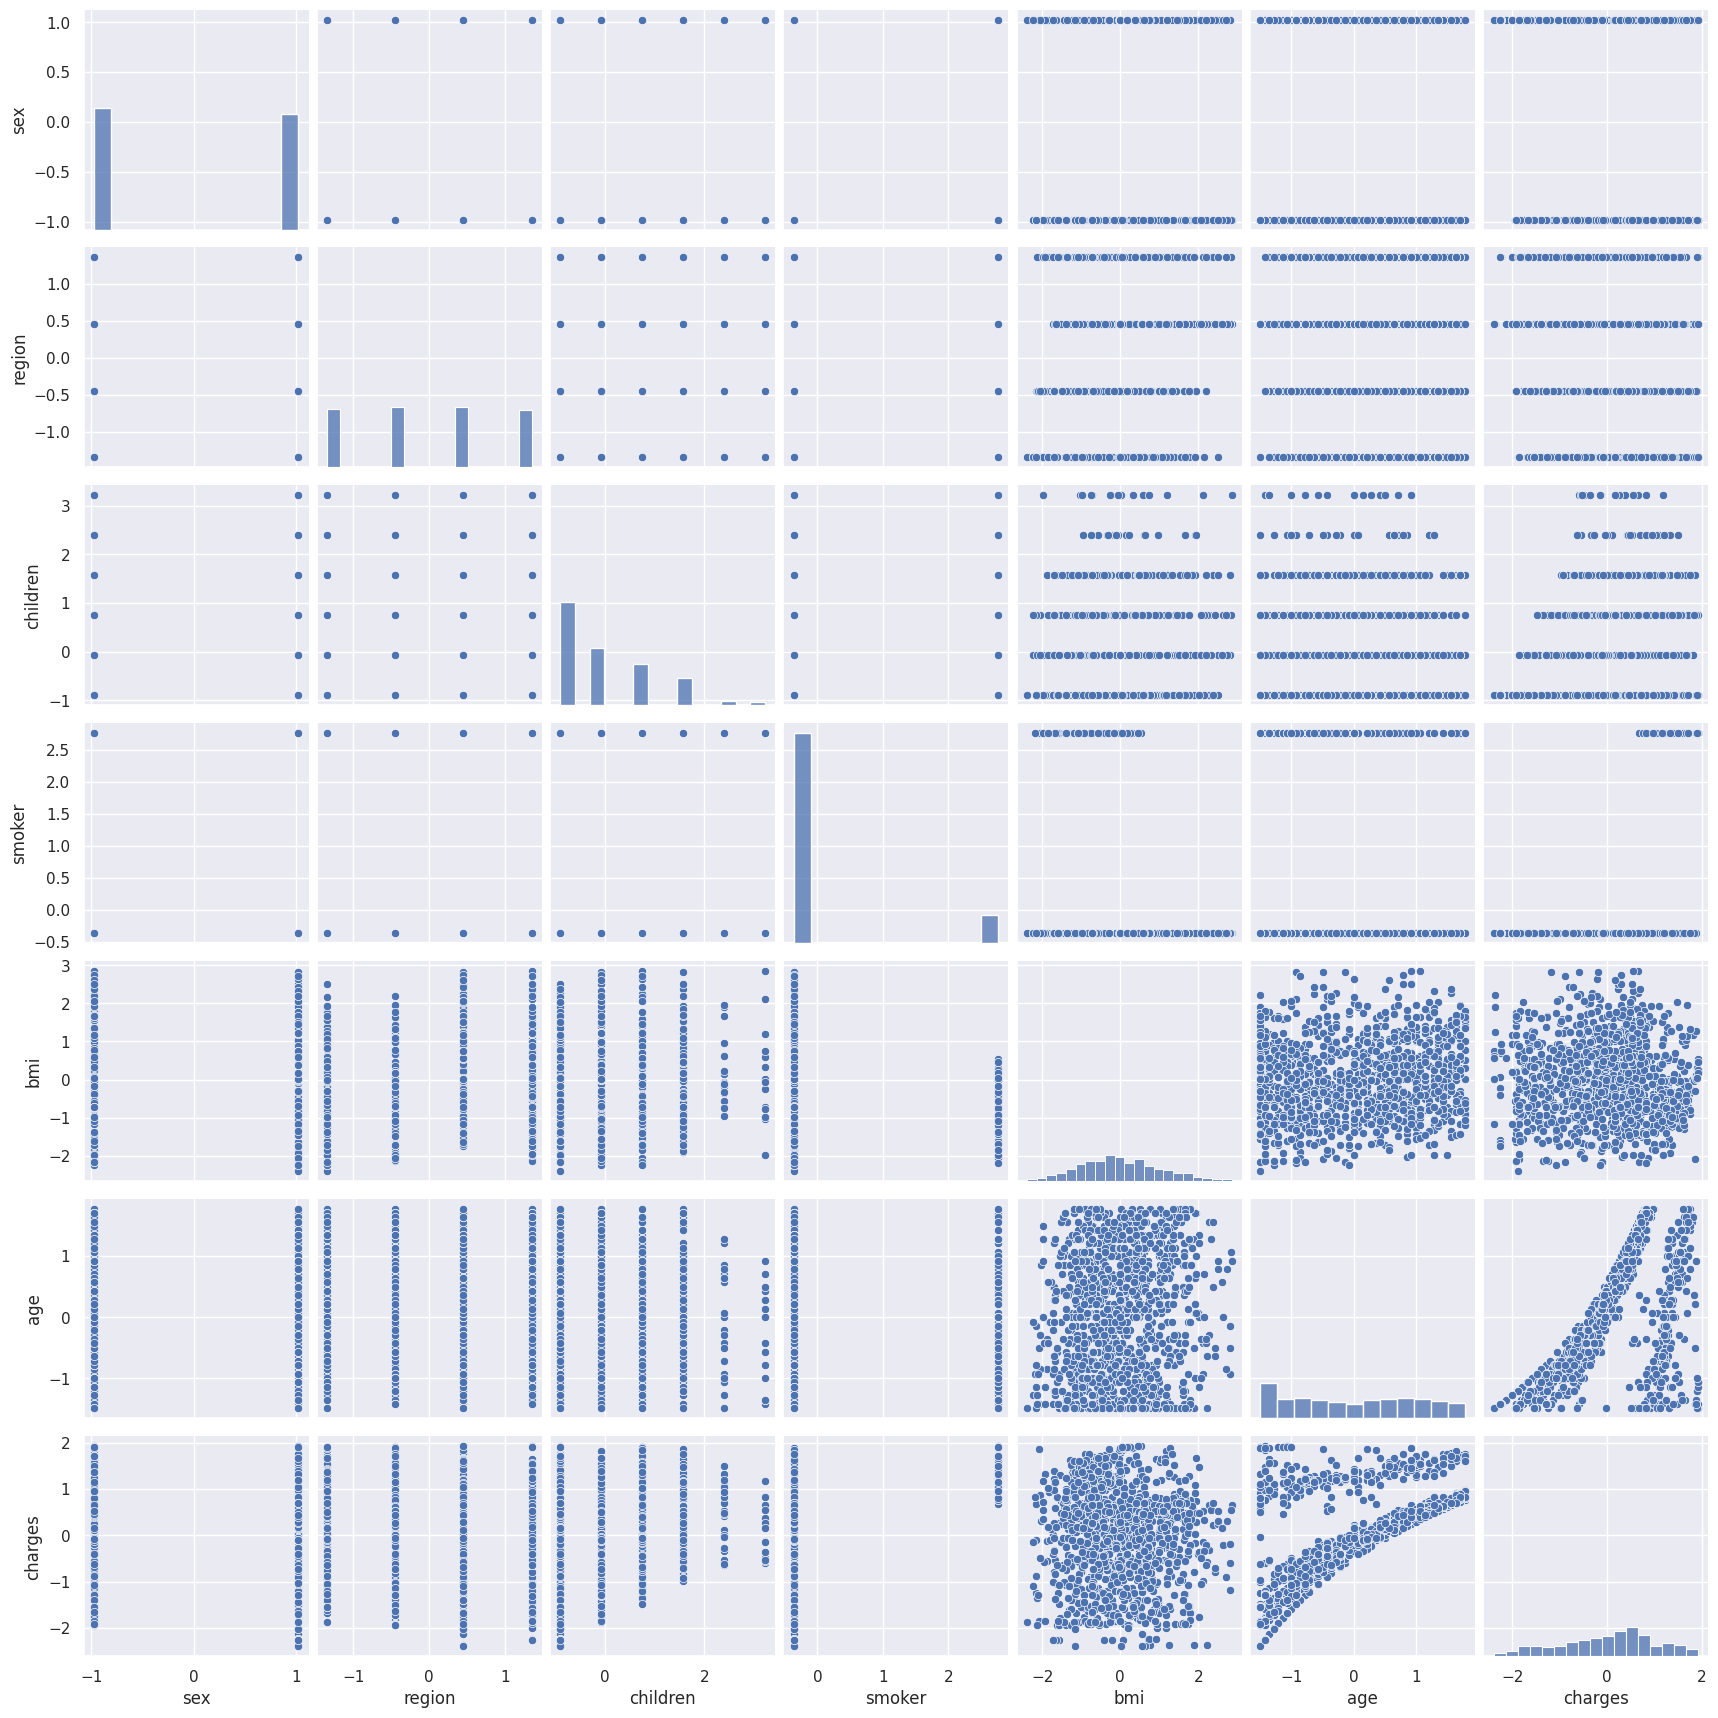

In [247]:
sns.set()
cols = ['sex', 'region', 'children', 'smoker', 'bmi', 'age', 'charges']
sns.pairplot(data[cols], height = 2.5)
plt.show();

<font color="orange">Observations:</font>
<font color="darkcyan"> As you can see from above charts, there is a linear relationship between age and charges, other charts can also provide useful insights into the relationships.</font>



---



# Task 3: 
Split the dataset into training and test sets.

Case 1 : Train = 80 % Test = 20% 
[ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% ;

Case 2 : Train = 10 % Test = 90% 
[ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90% ;


## Solution 3:

In [248]:
x = data.drop('charges',axis= 1)
y = data['charges']
print(x)
print(y)

           age       sex       bmi  children    smoker    region
0    -1.422613 -0.974732 -0.357458 -0.893170  2.762476  1.355475
1    -1.493750  1.025062  0.642659 -0.071040 -0.361690  0.455349
2    -0.782384  1.025062  0.511468  1.573221 -0.361690  0.455349
3    -0.426700  1.025062 -1.242571 -0.893170 -0.361690 -0.444777
4    -0.497837  1.025062 -0.190488 -0.893170 -0.361690 -0.444777
...        ...       ...       ...       ...       ...       ...
1333  0.782622  1.025062  0.165602  1.573221 -0.361690 -0.444777
1334 -1.493750 -0.974732  0.327460 -0.893170 -0.361690 -1.344903
1335 -1.493750 -0.974732  1.167423 -0.893170 -0.361690  0.455349
1336 -1.280340 -0.974732 -0.715251 -0.893170 -0.361690  1.355475
1337  1.565125 -0.974732 -0.158116 -0.893170  2.762476 -0.444777

[1192 rows x 6 columns]
0       1.020567
1      -1.848840
2      -0.657189
3       1.352580
4      -0.833743
          ...   
1333    0.434935
1334   -1.539836
1335   -1.920635
1336   -1.658167
1337    1.707121
Name: ch

### Case 1

In [249]:
# creating train and test sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=0)

In [250]:
print('\nTop 5 records in dataset - x_train1:\n', x_train1.head())
print('\nTotal records in dataset - x_train1:\n', x_train1.shape)


Top 5 records in dataset - x_train1:
            age       sex       bmi  children   smoker    region
620  -0.640110  1.025062  0.238864  -0.07104 -0.36169  1.355475
1004  0.569212  1.025062 -1.841448  -0.07104 -0.36169 -1.344903
1115  1.138305  1.025062  0.455244  -0.07104 -0.36169  0.455349
894   1.636262  1.025062  0.359832  -0.89317 -0.36169 -1.344903
686   0.213529  1.025062 -0.659879   0.75109 -0.36169 -1.344903

Total records in dataset - x_train1:
 (953, 6)


In [251]:
print('\nTop 5 records in dataset - y_train1:\n', y_train1.head())
print('\nTotal records in dataset - y_train1:\n', y_train1.shape)


Top 5 records in dataset - y_train1:
 620    -0.903132
1004    0.175849
1115    0.459257
894     0.744222
686     0.037596
Name: charges, dtype: float64

Total records in dataset - y_train1:
 (953,)


In [252]:
print('\nTop 5 records in dataset - x_test1:\n', x_test1.head())
print('\nTotal records in dataset - x_test1:\n', x_test1.shape)


Top 5 records in dataset - x_test1:
            age       sex       bmi  children   smoker    region
282  -0.640110  1.025062 -0.400904 -0.071040 -0.36169 -1.344903
348  -0.213291 -0.974732 -0.013295 -0.071040 -0.36169  0.455349
460   0.711486 -0.974732  1.129940  1.573221 -0.36169  0.455349
932   0.498076  1.025062 -0.715251  3.217481 -0.36169  1.355475
1109  0.426939  1.025062 -1.643810  1.573221 -0.36169  0.455349

Total records in dataset - x_test1:
 (239, 6)


In [253]:
print('\nTop 5 records in dataset - y_test1:\n', y_test1.head())
print('\nTotal records in dataset - y_test1:\n', y_test1.shape)


Top 5 records in dataset - y_test1:
 282    -0.718704
348    -0.395564
460     0.408664
932     0.373706
1109    0.172610
Name: charges, dtype: float64

Total records in dataset - y_test1:
 (239,)


<font color="orange">Observations:</font>
<font color="darkcyan"> As you can see the original 1192 records have been split into two sets, 953 records for train and 239 records for test, i.e. 80-20 ratio.</font>

### Case 2

In [254]:
# creating train and test sets
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.9, random_state=0)

In [255]:
print('\nTop 5 records in dataset - x_train2:\n', x_train2.head())
print('\nTotal records in dataset - x_train2:\n', x_train2.shape)


Top 5 records in dataset - x_train2:
           age       sex       bmi  children    smoker    region
331  0.924895  1.025062 -0.449462 -0.893170  2.762476 -0.444777
548 -0.995793 -0.974732 -0.239046 -0.893170 -0.361690 -1.344903
501  0.284666  1.025062 -0.676065 -0.893170 -0.361690 -1.344903
316  0.782622  1.025062  0.376018 -0.893170 -0.361690 -0.444777
906 -0.853520  1.025062  0.440762  1.573221 -0.361690 -1.344903

Total records in dataset - x_train2:
 (119, 6)


In [256]:
print('\nTop 5 records in dataset - y_train2:\n', y_train2.head())
print('\nTotal records in dataset - y_train2:\n', y_train2.shape)


Top 5 records in dataset - y_train2:
 331    1.483397
548   -1.066532
501   -0.116714
316    0.205779
906   -0.549551
Name: charges, dtype: float64

Total records in dataset - y_train2:
 (119,)


In [257]:
print('\nTop 5 records in dataset - x_test2:\n', x_test2.head())
print('\nTotal records in dataset - x_test2:\n', x_test2.shape)


Top 5 records in dataset - x_test2:
            age       sex       bmi  children   smoker    region
282  -0.640110  1.025062 -0.400904 -0.071040 -0.36169 -1.344903
348  -0.213291 -0.974732 -0.013295 -0.071040 -0.36169  0.455349
460   0.711486 -0.974732  1.129940  1.573221 -0.36169  0.455349
932   0.498076  1.025062 -0.715251  3.217481 -0.36169  1.355475
1109  0.426939  1.025062 -1.643810  1.573221 -0.36169  0.455349

Total records in dataset - x_test2:
 (1073, 6)


In [258]:
print('\nTop 5 records in dataset - y_test2:\n', y_test2.head())
print('\nTotal records in dataset - y_test2:\n', y_test2.shape)


Top 5 records in dataset - y_test2:
 282    -0.718704
348    -0.395564
460     0.408664
932     0.373706
1109    0.172610
Name: charges, dtype: float64

Total records in dataset - y_test2:
 (1073,)


<font color="orange">Observations:</font>
<font color="darkcyan"> As you can see the original 1192 records have been split into two sets, 119 records for train and 1073 records for test, i.e. 10-90 ratio.</font>



---



# Task 4:
Perform the model Building using Multiple Linear Regression for case 1 and case 
2 
[ Case 1 : Train = 80 % Test = 20% Case 2 : Train = 10 % Test = 90% ]
1. Normal SK-Learn library
2. Gradient Descent
3. Stochastic Gradient Descent
4. Mini Batch

## Solution 4:

In [259]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.422613,-0.974732,-0.357458,-0.893170,2.762476,1.355475,1.020567
1,-1.493750,1.025062,0.642659,-0.071040,-0.361690,0.455349,-1.848840
2,-0.782384,1.025062,0.511468,1.573221,-0.361690,0.455349,-0.657189
3,-0.426700,1.025062,-1.242571,-0.893170,-0.361690,-0.444777,1.352580
4,-0.497837,1.025062,-0.190488,-0.893170,-0.361690,-0.444777,-0.833743


### 4.1.a). Model Building using Multiple Linear Regression - case 1 - Normal SK-Learn library

In [260]:
model_1a = LinearRegression()
reg_1a=model_1a.fit(x_train1,y_train1)

In [261]:
predictions_1a = model_1a.predict(x_test1)

In [262]:
# The coefficients

# print the parameter theta1
modelCoefficientArray_41a = model_1a.coef_
print('Coefficent array = theta_1-n =', modelCoefficientArray_41a )

#print the parameter theta0
modelIntercept_41a= model_1a.intercept_
print('Intercept = theta_0 =', modelIntercept_41a )

Coefficent array = theta_1-n = [ 0.6554256  -0.05213983  0.04148871  0.17291767  0.53513422 -0.0909437 ]
Intercept = theta_0 = 0.008588413522969851


y=0.008588413522969851 + 0.6554256 * age - 0.05213983 * sex + 0.04148871 * bmi + 0.17291767 * children +  0.53513422 * smoker  - 0.0909437 * region

<font color="orange">Observations:</font>
<font color="darkcyan"> There are 6 coefficients for each of the six variables.</font>

### 4.1.b). Model Building using Multiple Linear Regression - case 2 - Normal SK-Learn library

In [263]:
model_1b = LinearRegression()
reg_1b=model_1b.fit(x_train2,y_train2)

In [264]:
predictions_1b = model_1b.predict(x_test2)

In [265]:
# The coefficients

# print the parameter theta1
modelCoefficientArray_41b = model_1b.coef_
print('Coefficent array = theta_1-n =', modelCoefficientArray_41b)

#print the parameter theta0
modelIntercept_41b = model_1b.intercept_
print('Intercept = theta_0 =', modelIntercept_41b )

Coefficent array = theta_1-n = [ 0.68037656 -0.1055394   0.0891344   0.18563551  0.48844356 -0.09467908]
Intercept = theta_0 = 0.029995409919780794


<font color="orange">Observations:</font>
<font color="darkcyan"> There are 6 variable coefficients and you can observe that the intercept value is higher for case 2 as compared to case1.</font>

y=0.029995409919780794 + 0.68037656 * age - 0.1055394 * sex + 0.0891344 * bmi + 0.18563551 * children + 0.48844356 * smoker - 0.09467908 * region

### 4.2.a). Model Building using Multiple Linear Regression - case 1 - Gradient Descent 

####Creating Cost and Gradient function

In [266]:
# w = weight, b = bias
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

#### Calculating weight and bias

In [295]:
w_1, modelIntercept_42a, c_1= GradientDescent(x_train1, y_train1, np.zeros(x_train1.shape[1]), 0, 0.01,epochs=2000)
modelCoefficientArray_42a =[]
for i in w_1:
  modelCoefficientArray_42a.append(round(i, 8))

print('\nCoefficient array or weights:', modelCoefficientArray_42a)
print('\nBias or Intercept:', modelIntercept_42a)


Cost is: 0.504088127859029
Cost is: 0.16276005416024003
Cost is: 0.15470793287148304
Cost is: 0.1544776641940377
Cost is: 0.1544691295141375
Cost is: 0.15446873026872862
Cost is: 0.15446870877987295
Cost is: 0.15446870754598863
Cost is: 0.15446870747326286
Cost is: 0.15446870746893304

Coefficient array or weights: [0.65542563, -0.05213982, 0.04148855, 0.17291767, 0.53513409, -0.09094364]

Bias or Intercept: 0.00858841434991445


y = 0.00858841434991445 + age * 0.655426 - sex * 0.052140 + bmi * 0.041489 + children * 0.172918 + smoker * 0.535134 - region * 0.090944

### 4.2.b). Model Building using Multiple Linear Regression - case b - Gradient Descent 

We will reuse the Cost and Gradient function from 4.2.a

#### Calculating weight and bias

In [294]:
w_2, modelIntercept_42b, c_2= GradientDescent(x_train2, y_train2, np.zeros(x_train2.shape[1]), 0, 0.01,epochs=2000)
modelCoefficientArray_42b =[]
for i in w_2:
  modelCoefficientArray_42b.append(round(i, 8))

print('\nCoefficient array or weights:', modelCoefficientArray_42b)
print('\nBias or Intercept:', modelIntercept_42b)


Cost is: 0.5483584968969842
Cost is: 0.19243199275217
Cost is: 0.1847082985702911
Cost is: 0.18445778331256224
Cost is: 0.18444425186281843
Cost is: 0.18444316774019337
Cost is: 0.18444306412877307
Cost is: 0.1844430536049049
Cost is: 0.18444305251358525
Cost is: 0.18444305239954575

Coefficient array or weights: [0.68037707, -0.10553933, 0.08913282, 0.18563601, 0.48844221, -0.09467863]

Bias or Intercept: 0.029995422971157367




y = 0.029995422971157367 + age * 0.680377 - sex * 0.105539 + bmi * 0.089133 + children * 0.185636 + smoker * 0.488442 - region * 0.094679 

<font color="orange">Observations:</font>
<font color="darkcyan"> Case 1 produced a lesser value of weight as compared to case 2 </font>

### 4.3.a). Model Building using Multiple Linear Regression - case 1 - Stochastic Gradient Descent 

In [269]:
clf = SGDRegressor(max_iter=2000, tol=1e-3)
cl = clf.fit(x_train1, y_train1)
modelCoefficientArray_43a =  cl.coef_
modelIntercept_43a = cl.intercept_

predictions_3a = clf.predict(x_test1)
print('\nIntercept:', modelIntercept_43a)
print('\nCoefficient array:', modelCoefficientArray_43a )


Intercept: [0.00524528]

Coefficient array: [ 0.65985202 -0.05567351  0.04128645  0.17094873  0.53628994 -0.09247206]


### 4.3.b). Model Building using Multiple Linear Regression - case 2 - Stochastic Gradient Descent 

In [270]:
clf = SGDRegressor(max_iter=2000, tol=1e-3)
cl = clf.fit(x_train2, y_train2)

modelCoefficientArray_43b =  cl.coef_
modelIntercept_43b = cl.intercept_

predictions_3b = clf.predict(x_test2)
print('\nIntercept:', modelIntercept_43b)
print('\nCoefficient array:', modelCoefficientArray_43b)


Intercept: [0.02030233]

Coefficient array: [ 0.66501619 -0.10457965  0.07607566  0.17945891  0.4657076  -0.08859625]


### 4.4.a). Model Building using Multiple Linear Regression - case 1 - Mini Batch 

In [271]:
import random

class MBGDRegressor:
    
    def __init__(self,batch_size,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
    def fit(self,x_train1,y_train1):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(x_train1.shape[1])
        
        for i in range(self.epochs):
            for j in range(int(x_train1.shape[0]/self.batch_size)):
                
                idx = random.sample(range(x_train1.shape[0]),self.batch_size)
                
                y_hat = np.dot(x_train1.iloc[idx],self.coef_) + self.intercept_
                #print("Shape of y_hat",y_hat.shape)
                intercept_der = -2 * np.mean(y_train1.iloc[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train1.iloc[idx] - y_hat),x_train1.iloc[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        return self.intercept_, self.coef_

        
    def predict(self,x_test1):
        return np.dot(x_test1,self.coef_) + self.intercept_

In [272]:
mbr = MBGDRegressor(batch_size=int(x_train1.shape[0]/50),learning_rate=0.01,epochs=100)

In [273]:
cl = mbr.fit(x_train1,y_train1)

modelCoefficientArray_44a =  cl[1]
modelIntercept_44a = cl[0]

print('\nIntercept:', modelIntercept_44a)
print('\nCoefficient array:', modelCoefficientArray_44a)


Intercept: -0.0011347222511704155

Coefficient array: [ 0.6896213  -0.04585751  0.03201873  0.12396179  0.50958444 -0.02350374]


In [274]:
predictions_4a = mbr.predict(x_test1)

### 4.4.b). Model Building using Multiple Linear Regression - case 2 - Mini Batch 

In [275]:
import random

class MBGDRegressor:
    
    def __init__(self,batch_size,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
    def fit(self,x_train2,y_train2):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(x_train2.shape[1])
        
        for i in range(self.epochs):
            for j in range(int(x_train2.shape[0]/self.batch_size)):
                
                idx = random.sample(range(x_train2.shape[0]),self.batch_size)
                
                y_hat = np.dot(x_train2.iloc[idx],self.coef_) + self.intercept_
                #print("Shape of y_hat",y_hat.shape)
                intercept_der = -2 * np.mean(y_train2.iloc[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train2.iloc[idx] - y_hat),x_train2.iloc[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        return self.intercept_, self.coef_
    
    def predict(self,x_test2):
        return np.dot(x_test2,self.coef_) + self.intercept_

In [276]:
mbr = MBGDRegressor(batch_size=int(x_train2.shape[0]/50),learning_rate=0.01,epochs=100)

In [277]:
cl = mbr.fit(x_train2,y_train2)

modelCoefficientArray_44b =  cl[1]
modelIntercept_44b = cl[0]

print('\nIntercept:', modelIntercept_44b)
print('\nCoefficient array:', modelCoefficientArray_44b)


Intercept: -0.05965240052010437

Coefficient array: [ 0.7710505  -0.11892274  0.04235422  0.2050628   0.49483972 -0.05084512]


In [278]:
predictions_4b = mbr.predict(x_test2)

In [279]:
print('\n Summary of Coefficient Arrays and Incepts from various models:\n')

print('\nNormal SK-Learn Library------')
print('\nCASE 1 - Train = 80 % Test = 20%\n')
print('\tIntercept:', modelIntercept_41a)
print('\tCoefficient Array:', modelCoefficientArray_41a)
print('\nCASE 2 - Train = 10 % Test = 90%\n')
print('\tIntercept:', modelIntercept_41b)
print('\tCoefficient Array:', modelCoefficientArray_41b)
print('\n-------------------------------------------------')

print('\nGradient Descent Algorithm------')
print('\nCASE 1 - Train = 80 % Test = 20%\n')
print('\tIntercept:', modelIntercept_42a)
print('\tCoefficient Array:', modelCoefficientArray_42a)
print('\nCASE 2 - Train = 10 % Test = 90%\n')
print('\tIntercept:', modelIntercept_42b)
print('\tCoefficient Array:', modelCoefficientArray_42b)
print('\n-------------------------------------------------')


print('\nStochastic Gradient Descent------')
print('\nCASE 1 - Train = 80 % Test = 20%\n')
print('\tIntercept:', modelIntercept_43a)
print('\tCoefficient Array:', modelCoefficientArray_43a)
print('\nCASE 2 - Train = 10 % Test = 90%\n')
print('\tIntercept:', modelIntercept_43b)
print('\tCoefficient Array:', modelCoefficientArray_43b)
print('\n-------------------------------------------------')


print('\nMini Batch------')
print('\nCASE 1 - Train = 80 % Test = 20%\n')
print('\tIntercept:', modelIntercept_44a)
print('\tCoefficient Array:', modelCoefficientArray_44a)
print('\nCASE 2 - Train = 10 % Test = 90%\n')
print('\tIntercept:', modelIntercept_44b)
print('\tCoefficient Array:', modelCoefficientArray_44b)
print('\n-------------------------------------------------')





 Summary of Coefficient Arrays and Incepts from various models:


Normal SK-Learn Library------

CASE 1 - Train = 80 % Test = 20%

	Intercept: 0.008588413522969851
	Coefficient Array: [ 0.6554256  -0.05213983  0.04148871  0.17291767  0.53513422 -0.0909437 ]

CASE 2 - Train = 10 % Test = 90%

	Intercept: 0.029995409919780794
	Coefficient Array: [ 0.68037656 -0.1055394   0.0891344   0.18563551  0.48844356 -0.09467908]

-------------------------------------------------

Gradient Descent Algorithm------

CASE 1 - Train = 80 % Test = 20%

	Intercept: 0.00858841434991445
	Coefficient Array: [0.65542563, -0.05213982, 0.04148855, 0.17291767, 0.53513409, -0.09094364]

CASE 2 - Train = 10 % Test = 90%

	Intercept: 0.029995422971157367
	Coefficient Array: [0.68037707, -0.10553933, 0.08913282, 0.18563601, 0.48844221, -0.09467863]

-------------------------------------------------

Stochastic Gradient Descent------

CASE 1 - Train = 80 % Test = 20%

	Intercept: [0.00524528]
	Coefficient Array: [ 0

<font color="orange">Observations:</font>
<font color="darkcyan"> As you can see the Intercepts and Coefficients are comparable for SK-Learn, GD and SGD, while it varies more for Mini Batch which is due to the randomized batch sizes.</font>



---





# Task 5:
Calculating the performance metrics for each model with respect to each case

## Solution 5:

### 5.1.a). MSE and Varience - Normal SK-learn library model - case 1

In [280]:
print('MAE:', metrics.mean_absolute_error(y_test1, predictions_1a))
print('MSE:', metrics.mean_squared_error(y_test1, predictions_1a))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, predictions_1a)))
print('R2:', metrics.explained_variance_score(y_test1, predictions_1a))

MAE: 0.27917722906979836
MSE: 0.22445229148426307
RMSE: 0.47376396178293584
R2: 0.7548419953842986


<font color="orange">Observations:</font>
<font color="darkcyan"> A higher R2 value (close to 1) indicates a higher amount of variability being explained by our model and vice-versa. For case 1 using Normal SK-Learn library model its 0.75 which is a good score.</font>

### 5.1.b). MSE and Varience - Normal SK-learn library model - case 2



In [281]:
print('MAE:', metrics.mean_absolute_error(y_test2, predictions_1b))
print('MSE:', metrics.mean_squared_error(y_test2, predictions_1b))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions_1b)))
print('R2:', metrics.explained_variance_score(y_test2, predictions_1b))

MAE: 0.34625780751040136
MSE: 0.2945027509153335
RMSE: 0.5426810766143716
R2: 0.7026434022430174



<font color="orange">Observations:</font>
<font color="darkcyan"> The R2 value for case 2 is less than R2 value for case 1 using Normal SK-learn library model. </font>

### 5.2.a). MSE and Varience - Gradient Descent model - case 1

#### Plotting the Cost

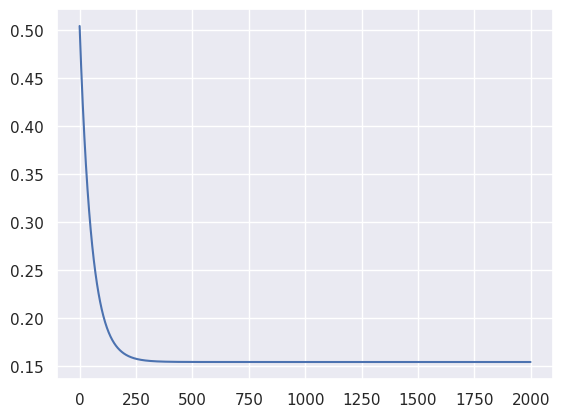

In [282]:
plt.plot(c_1)


<font color="orange">Observations:</font>
<font color="darkcyan"> From above graph the curve has very less change after 400 iterations. Technically we can stop after 400 epochs </font>

#### Predicting labels with the calculated weights and biases


In [283]:
def predict(x, w_1, b_1):
    return x.dot(w_1) + b_1
predictions_2a = predict(x_test1, w_1, b_1)

#### Calculating the r² accuracy of our model



In [284]:
def r2score(predictions_2a, y):
    rss = np.sum((predictions_2a - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(predictions_2a, y_test1)

0.7528214593894745

#### Performance summary

In [285]:
print('MAE:', metrics.mean_absolute_error(y_test1, predictions_2a))
print('MSE:', metrics.mean_squared_error(y_test1, predictions_2a))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, predictions_2a)))
print('R2:', metrics.explained_variance_score(y_test1, predictions_2a))

MAE: 0.2791772025641282
MSE: 0.22445227984860067
RMSE: 0.47376394950291506
R2: 0.7548420084663032


<font color="orange">Observations:</font>
<font color="darkcyan"> The r2 score value for case 1 using Gradient Decent model is similar as in model using normal sk-learn library (case1).</font>

### 5.2.b). MSE and Varience - Gradient Descent model - case 2

#### Plotting the Cost

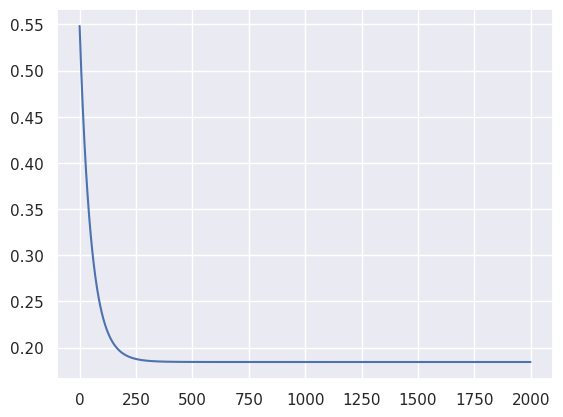

In [286]:
plt.plot(c_2)

#### Predicting Labels with Calculated weight and Bias

In [287]:
def predict(x, w_2, b_2):
    return x.dot(w_2) + b_2
predictions_2b = predict(x_test2, w_2, b_2)

#### Calculating the r² accuracy of our model

In [288]:
def r2score(predictions_2b, y):
    rss = np.sum((predictions_2b - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(predictions_2b, y_test2)

0.7015180335465014

#### Performance Summary

In [289]:
print('MAE:', metrics.mean_absolute_error(y_test2, predictions_2b))
print('MSE:', metrics.mean_squared_error(y_test2, predictions_2b))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions_2b)))
print('R2:', metrics.explained_variance_score(y_test2, predictions_2b))

MAE: 0.3462577574210429
MSE: 0.2945027596908844
RMSE: 0.5426810846997382
R2: 0.7026433943082666


<font color="orange">Observations:</font>
<font color="darkcyan"> The r2 score value for Gradient decent model is similar as in model using normal sk-learn library, and its lower in case2 as compared to case1.</font>

### 5.3.a). MSE and Varience - Stochastic Gradient Descent model - case 1

In [290]:
print('MAE:', metrics.mean_absolute_error(y_test1,predictions_3a))
print('MSE:', metrics.mean_squared_error(y_test1, predictions_3a))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, predictions_3a)))
print('R2:', metrics.explained_variance_score(y_test1, predictions_3a))

MAE: 0.2769515849271551
MSE: 0.22415730376455278
RMSE: 0.47345253591522013
R2: 0.754870427656521


<font color="orange">Observations:</font>
<font color="darkcyan"> The r2 score value for SGD is similar as in model using normal sk-learn library and GD.</font>



### 5.3.b). MSE and Varience - Stochastic Gradient Descent model - case 2:

In [291]:
print('MAE:', metrics.mean_absolute_error(y_test2,predictions_3b))
print('MSE:', metrics.mean_squared_error(y_test2, predictions_3b))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions_3b)))
print('R2:', metrics.explained_variance_score(y_test2, predictions_3b))

MAE: 0.34300634604747066
MSE: 0.29425580940763457
RMSE: 0.5424535089826912
R2: 0.702320861131684


<font color="orange">Observations:</font>
<font color="darkcyan"> The r2 score value for SGD model is similar as in model using normal sk-learn library and GD, and its lower in case2 as compared to case1.</font>

### 5.4.a). MSE and Varience - Mini Batch model - case 1

In [292]:
print('MAE:', metrics.mean_absolute_error(y_test1,predictions_4a))
print('MSE:', metrics.mean_squared_error(y_test1, predictions_4a))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, predictions_4a)))
print('R2:', metrics.explained_variance_score(y_test1, predictions_4a))

MAE: 0.2661323766873551
MSE: 0.22067941866057103
RMSE: 0.4697652803907192
R2: 0.7583895517372848


<font color="orange">Observations:</font>
<font color="darkcyan"> Since we're splitting into multiple batches, the random batch selection affects the model creation and each time the R2 values will vary based on the batch selection</font>

### 5.4.b). MSE and Varience - Mini Batch model - case 2

In [293]:
print('MAE:', metrics.mean_absolute_error(y_test2, predictions_4b))
print('MSE:', metrics.mean_squared_error(y_test2, predictions_4b))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions_4b)))
print('R2:', metrics.explained_variance_score(y_test2, predictions_4b))

MAE: 0.3064859842952045
MSE: 0.31003317553717574
RMSE: 0.5568062279978339
R2: 0.6888428687915091



<font color="orange">Observations:</font>
<font color="darkcyan"> Same behaviour is observed as in case 1, and case 2 have even lower r2</font>



---



# Task 6:
Compare the overall result and write the observations for each model and
provide conclusion.

## Solution 6:

<font color="orange" size=5>Conclusion and Observations</font> </br>
<font color="orange">SKLEARN's Linear Regression</font>
<font color="darkcyan">  Since we have limited number of dataset the sklearn's default LR library is able to provide the best model but in real time scenario we may not be able to get a model with this method due to computational complexity</font></br>

<font color="orange">Vanilla Gradient Descent</font>
<font color="darkcyan">  Though Vanilla GD is better that above method computationally, it is still expensive. We can see it even provides competing result/performance comapred with SKlearn's LR</font></br>

<font color="orange">Stochastic Gradient Descent</font>
<font color="darkcyan">  From the results, we're able to get a good model by rnadomly selecting training data to build our model. The R2 values are very close to the above 2 algorithms showing us that this method is efficient in getting us the model with good results</font></br>

<font color="orange">Minibatch Gradient Descent</font>
<font color="darkcyan">  Our results show that  this method could not catch up to the performance of the previous algorithms but when working with millions of data, this should help us build a model with best efficiency. By combining with SGDA, we can expect the performance also to be really good</font></br>

<font color="orange">Note:</font>
<font color="darkcyan"> 
1. From correlation matrices, it is pretty evident that we can drop non influencing independent variables like region and gender to improve our model prediction. </br>
2. The max R2 values we could reach we around 75. This value changes a bit when the training data is randomly shuffled. </br>
3. Though R2 is a good measure for performance, we need to also consider the MSE which actually shows the the squared sum of differences from the actual value to our multi-linear model. </br>
4. Other preprocessing techniques could have been performed to improve the model building but since we don't have enough knowledge to choose the best methods, we performed model creation with limited knowledge gathered from online sites and shared examples
</br>
</font>



---

